<a href="https://colab.research.google.com/github/GruAna/VU/blob/master/results_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text detection and recognition
### Results visualisation

In [104]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [139]:
def get_text(document):
    # labels = [" ".join(text[0:2]) for text in document]
    values = list(zip(*document))
    letters = [string.ascii_uppercase[i] for i in range(len(values[0]))]
    infos = values[:2]
    iou = [round(float(v),2) for v in values[3]]
    cer = [round(float(v),2) for v in values[5]]

    return (letters, infos, iou, cer)

# plot results functions

def autolabel(ax, rects):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 11),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def draw_results(labels, iou, cer, title):
    x = np.arange(len(labels))
    
    width = 0.4  # bar width

    fig, ax = plt.subplots(figsize=(22,7))
    rects1 = ax.bar(x - width/2, iou, width)
    rects2 = ax.bar(x + width/2, cer, width)

    plt.ylabel('Accuracy')
    plt.xlabel('Method')
    plt.title('Results - ' + title)
    plt.xticks(x, labels)

    plt.ylim([0, 100])

    autolabel(ax, rects1)
    autolabel(ax, rects2)

    # plt.bar(x - 0.2, iou, 0.4, label = 'IOU')
    # plt.bar(x + 0.2, cer, 0.4, label = 'CER')
    plt.legend()
    plt.savefig('res'+datasets[i]+'.png')
    plt.show()

In [95]:
# list files with results

results_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/results_methods/'
(_, _, filenames) = next(os.walk(results_dir))
filenames = [ file for file in filenames if file.endswith(".txt") ]
datasets = ["Kaist","BD","CTW"]

result_files=[]
for i in range(len(datasets)):
    result_files.append(sorted([os.path.join(results_dir, file) for file in filenames if datasets[i] in file]))
   

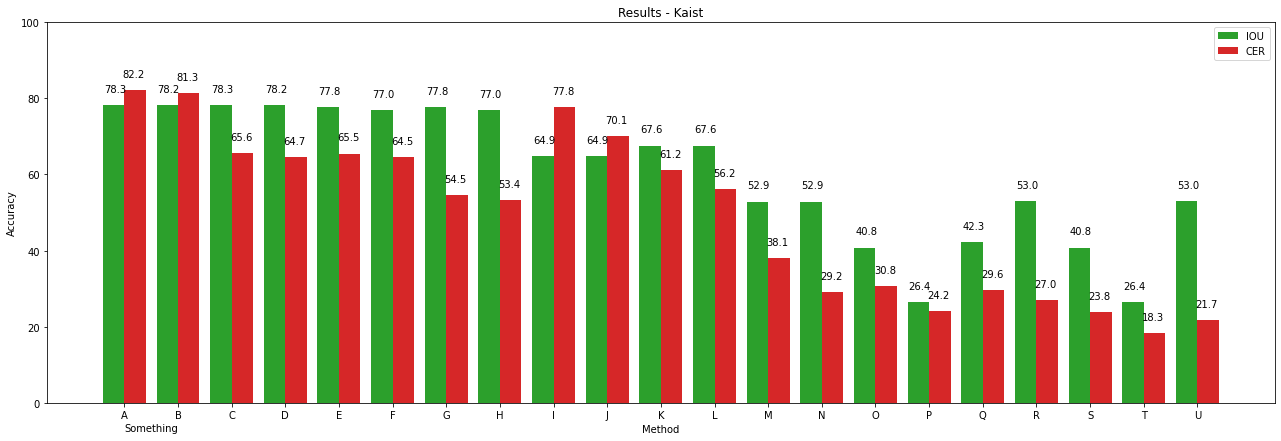

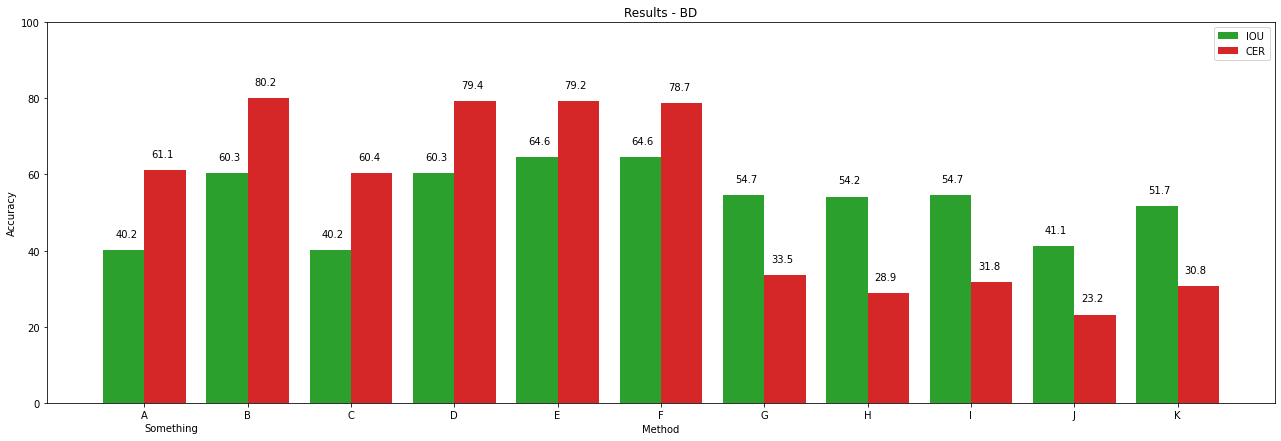

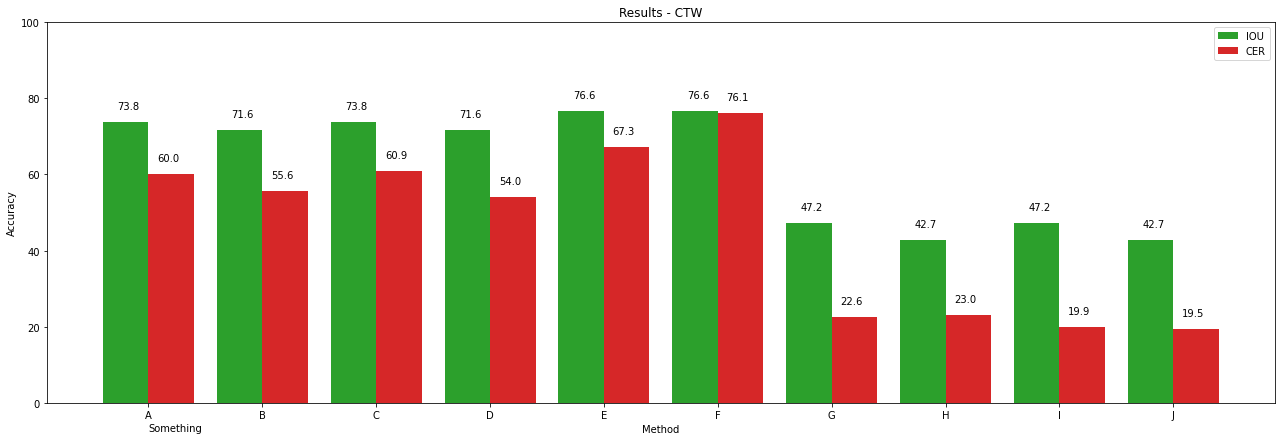

In [140]:
for i, files in enumerate(result_files):
    results = []

    for filename in files:
        with open(filename, "r+") as file:
            results.append(re.split(': |\n| = ', file.read()))
    
    letters, infos, iou, cer = get_text(results)
    draw_results(letters, iou, cer, datasets[i])
    df_info = pd.DataFrame(list(zip(letters, infos[0], infos[1])), columns =['Key', 'Method', 'Properties'])
    df_info.to_csv('res'+datasets[i]+'.csv')

